<a href="https://colab.research.google.com/github/TenzinYangzom158/Machine-Learning---01/blob/main/Lab3_DataProprocessingAndKNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Tenzin Yangzom
##### 2147158
##### MCA 'A'

# Lab 2: Implement the data preprocessing techniques and KNN

In [1]:
import pandas as pd # for data manipulation
import numpy as np # for data manipulation

from sklearn.model_selection import train_test_split # for splitting the data into train and test samples
from sklearn.metrics import classification_report # for model evaluation metrics
from sklearn.preprocessing import MinMaxScaler # for feature scaling
from sklearn.preprocessing import OrdinalEncoder # to encode categorical variables
from sklearn.neighbors import KNeighborsClassifier # for KNN classification
from sklearn.neighbors import KNeighborsRegressor # for KNN regression

import matplotlib.pyplot as plt # for data visualization
import plotly.express as px # for data visualization

In [2]:
!git clone https://github.com/TenzinYangzom158/Machine-Learning---01.git

Cloning into 'Machine-Learning---01'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 21 (delta 7), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (21/21), done.


In [3]:
# Read in data
df = pd.read_csv('Machine-Learning---01/possum.csv', encoding='utf-8')
# Print dataframe
df

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


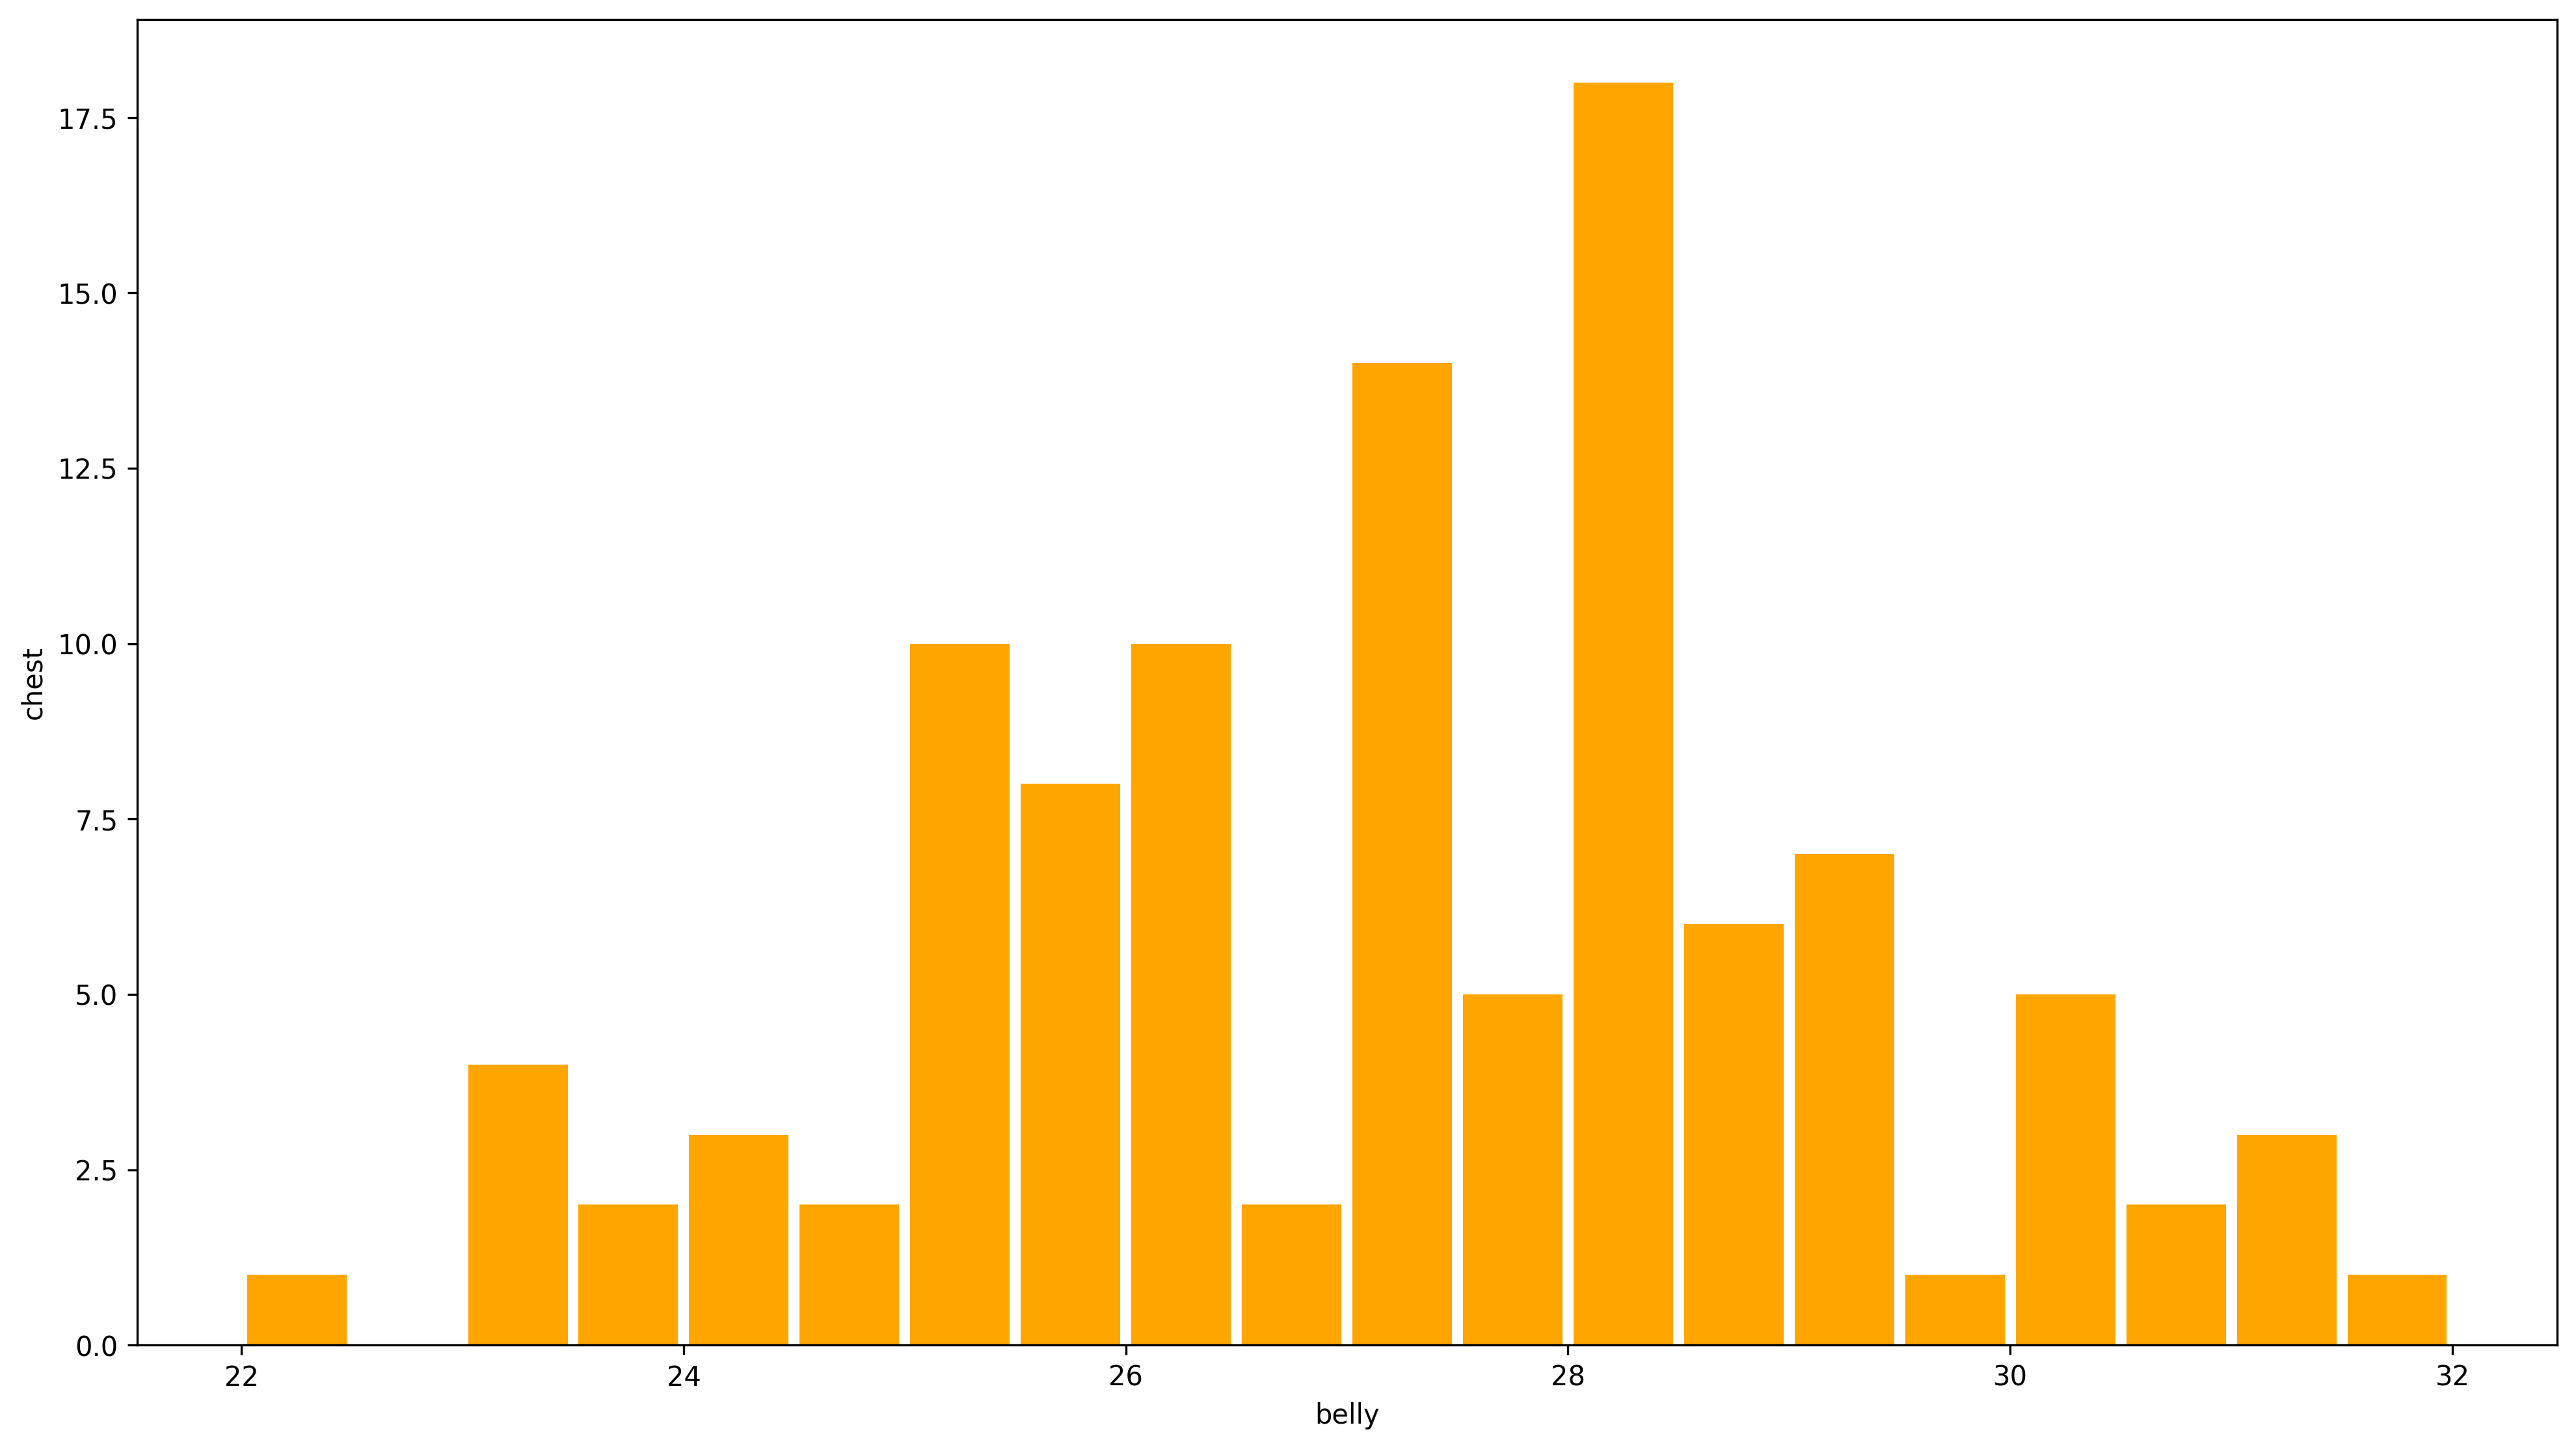

In [41]:
# distribution chart
plt.figure(figsize=(16,9), dpi=300)
plt.xlabel('belly')
plt.ylabel('chest')
plt.hist(df['chest'], bins=20, color='orange', rwidth=0.9)
plt.show()

In [27]:
df.isna().sum()  # isna() and isnull() does the same function (detecting missing values)

case            0
site            0
Pop             0
sex             0
age             0
hdlngth         0
skullw          0
totlngth        0
taill           0
footlgth        0
earconch        0
eye             0
chest           0
belly           0
hdlngth scl     0
totlngth scl    0
Pop enc         0
dtype: int64

In [28]:
# Filling missing values with average

df = df.fillna(df.mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


In [29]:
df.isna().sum()

case            0
site            0
Pop             0
sex             0
age             0
hdlngth         0
skullw          0
totlngth        0
taill           0
footlgth        0
earconch        0
eye             0
chest           0
belly           0
hdlngth scl     0
totlngth scl    0
Pop enc         0
dtype: int64

In [30]:
df.shape

(104, 17)

In [42]:
# Step 1 - Preprocess data
# Min-Max scaling
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()
df['belly scl']=scaler.fit_transform(df[['belly']])
df['chest scl']=scaler.fit_transform(df[['chest']])

# Encode Pop for usage as target in the classification model
enc=OrdinalEncoder() # select encoding method
df['Pop enc']=enc.fit_transform(df[['Pop']]) # encode categorical values

In [43]:
# Step 2 - Create training and testing samples (note, we have two sets of targets (yC and yR))
# Split into train and test dataframes
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

# Independent variables (features)
X_train=df_train[['belly scl', 'chest scl']]
X_test=df_test[['belly scl', 'chest scl']]
# Target for classification model
yC_train=df_train['Pop enc'].ravel()
yC_test=df_test['Pop enc'].ravel()
# Target for regression model
yR_train=df_train['chest'].ravel()
yR_test=df_test['chest'].ravel()

In [44]:
# Step 3a - Set model parameters - Classification
modelC = KNeighborsClassifier(n_neighbors=5, 
                              weights='uniform',  
                              metric_params=None, 
                              n_jobs=-1 
                            ) 
# Step 3b - Set model parameters - Regression
modelR = KNeighborsRegressor(n_neighbors=5, 
                             weights='uniform', 
                             algorithm='auto', 
                             metric_params=None,
                             n_jobs=-1 
                            )

In [45]:
# Step 4 - Fit the two models
clf = modelC.fit(X_train, yC_train)
reg = modelR.fit(X_train, yR_train)

In [46]:
# Step 5 - Predict class labels / target values
# Predict on training data
pred_labels_tr = modelC.predict(X_train)
pred_values_tr = modelR.predict(X_train)

In [47]:
# Predict on a test data
pred_labels_te = modelC.predict(X_test)
pred_values_te = modelR.predict(X_test)

In [48]:
# Step 6 - Print model results
# Basic info about the model
print('---------------------------------------------------------')
print('****************** KNN Classification ******************')    
print('Classes: ', clf.classes_)
print('Effective Metric: ', clf.effective_metric_)
print('Effective Metric Params: ', clf.effective_metric_params_)
print('No. of Samples Fit: ', clf.n_samples_fit_)
#print('Outputs 2D: ', clf.outputs_2d_)
#print('--------------------------------------------------------')
print("")

print('*************** Evaluation on Test Data ***************')
scoreC_te = modelC.score(X_test, yC_test)
print('Accuracy Score: ', scoreC_te)
# Look at classification report to evaluate the model
print(classification_report(yC_test, pred_labels_te))
#print('--------------------------------------------------------')
print("")

print('*************** Evaluation on Training Data ***************')
scoreC_tr = modelC.score(X_train, yC_train)
print('Accuracy Score: ', scoreC_tr)
# Look at classification report to evaluate the model
print(classification_report(yC_train, pred_labels_tr))
print('---------------------------------------------------------')

# Basic info about the model
print("")
print('****************** KNN Regression ******************')    
print('Effective Metric: ', reg.effective_metric_)
print('Effective Metric Params: ', reg.effective_metric_params_)
print('No. of Samples Fit: ', reg.n_samples_fit_)
print("")
scoreR_te = modelR.score(X_test, yR_test)
print('Test Accuracy Score: ', scoreR_te)
scoreR_tr = modelR.score(X_train, yR_train)
print('Training Accuracy Score: ', scoreR_tr)

print('---------------------------------------------------------')


---------------------------------------------------------
****************** KNN Classification ******************
Classes:  [0. 1.]
Effective Metric:  euclidean
Effective Metric Params:  {}
No. of Samples Fit:  83

*************** Evaluation on Test Data ***************
Accuracy Score:  0.42857142857142855
              precision    recall  f1-score   support

         0.0       0.42      0.50      0.45        10
         1.0       0.44      0.36      0.40        11

    accuracy                           0.43        21
   macro avg       0.43      0.43      0.43        21
weighted avg       0.43      0.43      0.43        21


*************** Evaluation on Training Data ***************
Accuracy Score:  0.7108433734939759
              precision    recall  f1-score   support

         0.0       0.65      0.72      0.68        36
         1.0       0.77      0.70      0.73        47

    accuracy                           0.71        83
   macro avg       0.71      0.71      0.71      